In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df= pd.read_csv('/kaggle/input/heightweight/Height-Weight Data.csv',sep=',') #reading the dataset which is in csv format

In [5]:
df.head() #this statement prints 1st 5 data from dataset

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [6]:
df.Height #showing only the Height

0       73.847017
1       68.781904
2       74.110105
3       71.730978
4       69.881796
          ...    
3496    69.296830
3497    70.542201
3498    73.912549
3499    67.396021
3500    72.738970
Name: Height, Length: 3501, dtype: float64

In [8]:
df['Height'] #another technique to visualization specific column  

0       73.847017
1       68.781904
2       74.110105
3       71.730978
4       69.881796
          ...    
3496    69.296830
3497    70.542201
3498    73.912549
3499    67.396021
3500    72.738970
Name: Height, Length: 3501, dtype: float64

In [9]:
df.shape #showing how many rows and columns the dataset has 

(3501, 2)

In [10]:
row,col = df.shape #storing values of row and column into row and col variables

In [11]:
row #displaying row count

3501

In [12]:
col #displaying column count

2

In [13]:
df.tail() #this method helps us to display the last 5 values from dataset

,Height,Weight
3496,69.296830,185.649086
3497,70.542201,210.198845
3498,73.912549,202.429960
3499,67.396021,144.277671
3500,72.738970,187.222909


In [18]:
df[295:300] #using this command we can display specific number of dataset we want 

,Height,Weight
295,67.852131,194.744522
296,67.549069,183.266533
297,74.767447,210.369909
298,71.418946,198.042484
299,67.120344,172.664090


Text(0.5, 1.0, 'Height-Weight')

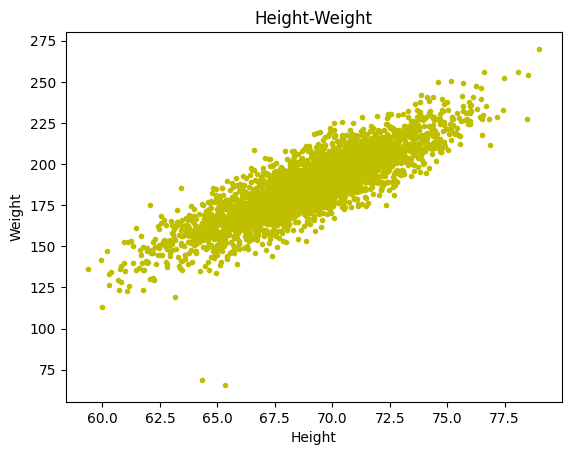

In [21]:
plt.scatter(df.Height, df.Weight,color='y',marker='.') #or plt.scatter(df[['Height']],df[['Weight']])
#we can use both statement for scatting the plots
plt.xlabel('Height') #labeling the x plot
plt.ylabel('Weight') #labeling the y plot
plt.title('Height-Weight') #showing title of the plot


In [22]:
df.Height.mean() #mean value of Height column

69.02441087268781

In [23]:
df.Weight.mean() #mean value of Weight column

186.891257979463

In [24]:
x=df.drop('Weight',axis=1) #axis=1 means column, 0 means row 
#we drop Weight because Weight is dependent which is basically y

In [26]:
y=df[['Weight']] #store Weight in y because it's dependent on the values of x

In [27]:
x.head() #displaying the value we stored in x without Weight

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796


In [28]:
y.head() #displaying values stored in y only Weight

,Weight
0,241.893563
1,162.310473
2,212.740856
3,220.042470
4,206.349801


In [29]:
df.head() #displaying and comfirm data frame is intact

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [30]:
#splitting dataset into train and test set
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split as tts

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [31]:
xtrain, xtest, ytrain, ytest = tts(x,y,test_size=0.33, random_state=1) #import moduel for train test

In [32]:
xtrain.head() #displaying 1st 5 train data without Weight

,Height
166,66.262820
1011,71.738695
1344,67.750330
1563,71.690869
476,68.515523


In [33]:
ytrain.head() #displaying 1st 5 train data of weight

,Weight
166,162.779583
1011,185.842622
1344,179.115883
1563,188.656335
476,176.141239


In [34]:
xtest.head() #displaying 1st 5 test data without weight

,Height
719,67.402821
2296,69.560033
3083,65.809912
1296,67.687531
2234,65.077902


In [35]:
ytest.head() #displaying 1st 5 test data of weight

,Weight
719,192.672676
2296,187.491501
3083,191.563495
1296,177.909685
2234,165.313807


# Linear Regression

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
reg = LinearRegression() # creating linear regression object

In [40]:
reg.fit(xtrain, ytrain) #training model

LinearRegression()

In [43]:
reg.predict([[69.025554]]) #predict Weight

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[186.74443189]])

In [45]:
m = reg.coef_ #storing m coefficient
m

array([[5.9467582]])

In [46]:
c = reg.intercept_ #storing c intercept
c

array([-223.73384719])

In [48]:
predicted = (m*69.025554) + c #predict Weight using basic formula
predicted

array([[186.74443189]])

In [49]:
reg.predict([[69.025554]]) #check the value of prediction using model only

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[186.74443189]])

In [50]:
reg.predict(xtest) #displaying all the prediction againest test cases

array([[177.09443165],
       [189.92284867],
       [167.62178605],
       ...,
       [179.20146692],
       [198.1912708 ],
       [190.70609708]])

In [51]:
df2 = df.copy() #copy dataframe to remain unchanged

In [52]:
df2.head() #displaying new df2's 1st 5 data 

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [53]:
df2['predicted_Weight'] = reg.predict(df[['Height']]) #adding a new column predicted Weight after Weight(orginal) 

In [54]:
df2.head() #confirming after displaying the data frame

,Height,Weight,predicted_Weight
0,73.847017,241.893563,215.416507
1,68.781904,162.310473,185.295505
2,74.110105,212.740856,216.981030
3,71.730978,220.042470,202.832937
4,69.881796,206.349801,191.836295


In [55]:
df.head() #display and check the the 1st data frame is remain unchanged

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


# Best fit Line

Text(0.5, 1.0, 'Height-Weight')

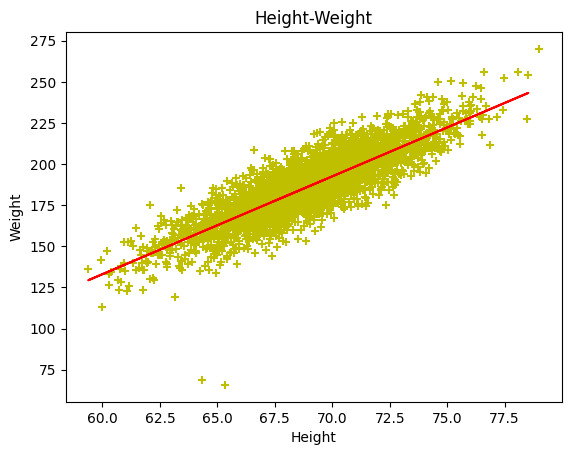

In [56]:
plt.scatter(df[['Height']] , df[['Weight']], color='y', marker='+') #plotting the scatter point Height vs Weight
plt.plot(xtest, reg.predict(xtest), color='red') # reg.predict(xtest) = m*xtest + c
plt.xlabel('Height') 
plt.ylabel('Weight') #labelling the axises
plt.title('Height-Weight') #title the plot

Text(0.5, 1.0, 'Height-Weight')

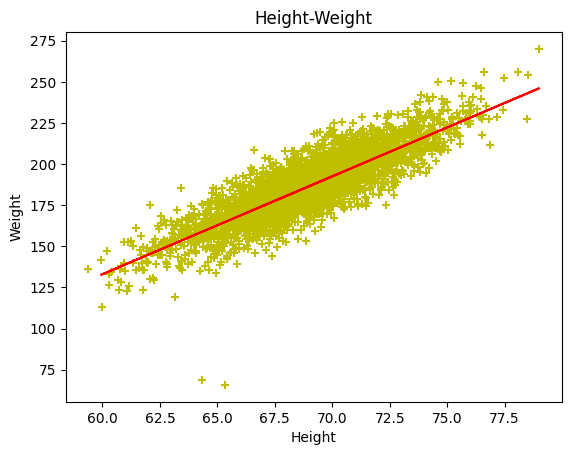

In [58]:
plt.scatter(df[['Height']] , df[['Weight']], color='y', marker='+')
plt.plot(xtrain, reg.predict(xtrain), color='red') #plotting the xtrain for best fit line
plt.xlabel('Height') 
plt.ylabel('Weight')
plt.title('Height-Weight')

In [60]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [61]:
#testing MSE
testMSE = mean_squared_error(ytest, reg.predict(xtest)) #ytest is actual y, reg.predict(xtest) is actually predicted y
testMSE

111.14654406073984

In [62]:
#testing MAE
testMAE = mean_absolute_error(ytest, reg.predict(xtest)) #ytest is actual y, reg.predict(xtest) is actually predicted y
testMAE

8.29430074943638

In [63]:
#training MSE
trainMSE = mean_squared_error(ytrain, reg.predict(xtrain)) #finding predicted y from training data. Here ytrain is y and reg.predict(xtrain) is predicted y
trainMSE

103.4875929238486

In [64]:
#training MAE
trainMAE = mean_absolute_error(ytrain, reg.predict(xtrain))
trainMAE

7.95548845242242